<font style='font-size:1.5em'>**💻 W07 Lab Notebook**</font><br>
<font style='font-size:1.3em;color:#888888'>Normalising JSON + the Groupby -> Apply -> Combine Strategy </font>

<font style='font-size:1.2em'>LSE [DS105A](https://lse-dsi.github.io/DS105/autumn-term/index.html){style="color:#e26a4f;font-weight:bold"} – Data for Data Science (2024/25) </font>



<div style="color: #333333; background-color:rgba(226, 106, 79, 0.075); border-radius: 10px; box-shadow: 0 4px 8px rgba(0, 0, 0, 0.1); padding: 20px 0 20px 10px; margin: 10px 0 10px 0; flex: 1 1 calc(45% - 20px);min-width: 250px;max-width: 350px;align-items:top;min-height: calc(45% - 20px); box-sizing: border-box;font-size:0.9em;">

🗓️ **DATE:** 15 November 2024 
</div>


**CREATORS:**  

- [Alex Soldatkin](https://github.com/alex-soldatkin) provided the dataset, the use case and a starting code
- Dr. [Jon Cardoso-Silva](https://jonjoncardoso.github.io) adjusted the content to meet the lecture more closely

**DEPARTMENT:** [LSE Data Science Institute](https://lse.ac.uk/dsi)

**OBJECTIVE**: Practice normalising JSON data and using the groupby -> apply -> combine strategy to aggregate data.

**REFERENCES:**

- The [`pd.json_normalize()` function](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.json_normalize.html) to convert JSON data more easily into tabular format

- The [DataFrame.explode()](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.explode.html) function to handle cases when columns are made out of lists

In the labs later (second notebook), we will also cover:

- The [DataFrame.groupby()](https://pandas.pydata.org/pandas-docs/stable/reference/groupby.html) function, combined with apply() and agg() to aggregate data 

---

<div style="background-color:white;padding:0.5em;margin-left:2em;margin-bottom:1em;border-radius:0.5em;font-family: monospace;border: 1px solid #eda291;font-size:1.05em;width:500px">

💽 **DATA SPECIFICATION CARD:**

<font style="font-size:0.8em">We're going to use data from the [OpenSanctions](https://www.opensanctions.org/) project. This dataset includes information about individuals and entities that governments and international organizations have sanctioned worldwide. OpenSanctions is operated by a German company, [OpenSanctions Datenbanken GmbH](https://www.opensanctions.org/docs/about/), and has received funding from the German Federal Ministry for Education and Research. They offer a paid API for accessing the data, but you can also download the [data in bulk](https://www.opensanctions.org/datasets/sanctions/) for free, for academic and research purposes.</font>

A few things to know about the dataset:

- **We are focusing on Targets.** These are the individuals and entities that have been sanctioned. This dataset includes information about the name, country, and other 'properties' of the targets.

- **We have filtered for Russian Targets.** This in part because Alex, who provided us with the data sample for this lab, is doing a PhD where he focuses on studying Russia, and also because the dataset is large and we want to make it more manageable for this lab.

- **We are using a small random sample.** Again, this is to make the dataset more manageable for this lab. The full dataset is much larger. 

</div>

In [225]:
# To convert files to a suitable Python format (list or dictionary)
import json
import pycountry

import numpy as np
import pandas as pd

from IPython.display import Image

from lets_plot import *
LetsPlot.setup_html()

# 1. Let's normalise the JSON data

- You can work alone or in small groups for this. 

- If you want, feel free to play a game of <span style="display: inline-block; padding: 0 7.5px; font-size: 12px; font-weight: bold; line-height: 18px; white-space: nowrap; border: 1px solid rgba(20, 18, 11, 0.75); border-radius: 0.5em; color: rgb(20, 18, 11); background-color: rgba(255, 255, 255, 0.75); vertical-align: top; box-shadow: 0 4px 8px rgba(0, 0, 0, 0.1)"> 🧑‍✈️ Pilot</span> and <span style="display: inline-block; padding: 0 7.5px; font-size: 12px; font-weight: bold; line-height: 18px; white-space: nowrap; border: 1px solid rgba(20, 18, 11, 0.75); border-radius: 0.5em; color: #ac831d; background-color: rgba(255, 255, 255, 0.75); vertical-align: top; box-shadow: 0 4px 8px rgba(0, 0, 0, 0.1)">🙋 Copilot (s)</span> like we've done in the past.

Treat everything that comes below as 🎯 **ACTION POINTS:**


## 1.1 Read JSON data into a Python object

We have a JSON file called `data/sample_single_target.json` that contains information about a single target of sanctions.

Run the code below that reads the data from the file into a suitable Python object (either list or dictionary):

In [226]:
with open('../data/opensanctions/sample_single_target.json', mode='r') as file:
    sample_target = json.load(file)

## 1.2 Explore the JSON data:

Either browse the file or print the object you read the JSON data into to understand its structure.

**Questions:**

1. What is the type of the object that you read the JSON data into?

    My answer: 

    **Dictionary.**

2. Is this a flat or nested JSON object?

    My answer: 
    
    **Nested.**

3. Can this object be converted into a DataFrame directly (with `pd.DataFrame()`), or do we need to do some pre-processing first?

    My answer: 
    
    **This JSON object is deeply nested, so it cannot be directly converted into a flat pandas.DataFrame using pd.DataFrame() without some preprocessing.**

    

## 1.3 Normalise the JSON data

- Convert the JSON data into a DataFrame using the `pd.json_normalize()` function.

- Store the resulting DataFrame in a variable called `df_sample`.

You should see something like this:

In [227]:
# This code will convert the JSON file to a pandas DataFrame, it takes the keys of the dictionary as columns and the values as rows
df_sample = pd.json_normalize(sample_target)


In [228]:
display(df_sample)

,id,caption,schema,referents,datasets,first_seen,last_seen,last_change,target,properties.alias,...,properties.address,properties.position,properties.nationality,properties.sourceUrl,properties.fatherName,properties.birthCountry,properties.birthPlace,properties.createdAt,properties.country,properties.sanctions
0,Q61116762,Aleksey Mikhailovich SALYAEV,Person,"[gb-fcdo-rus0208, au-dfat-3611-oleksii-mykhail...","[eu_fsf, au_dfat_sanctions, ua_nsdc_sanctions,...",2022-04-27T18:12:14,2024-09-30T06:58:02,2024-08-23T00:00:00,True,"[САЛЯЕВ Алексей Михайлович, Alexei Mikhailovic...",...,"[АР Крим, м. Сімферополь, вул. Федотова, 27, У...",[командир прикордонного сторожового корабля «Д...,[ru],[https://gels-avoirs.dgtresor.gouv.fr/Gels/Reg...,"[Mikhailovich, Михайлович]",[ua],[The Autonomous Republic of Crimea and the cit...,[2019-03-16],[ru],[{'id': 'au-dfat-b9ca38783b02c98ff4860e31b0f9c...


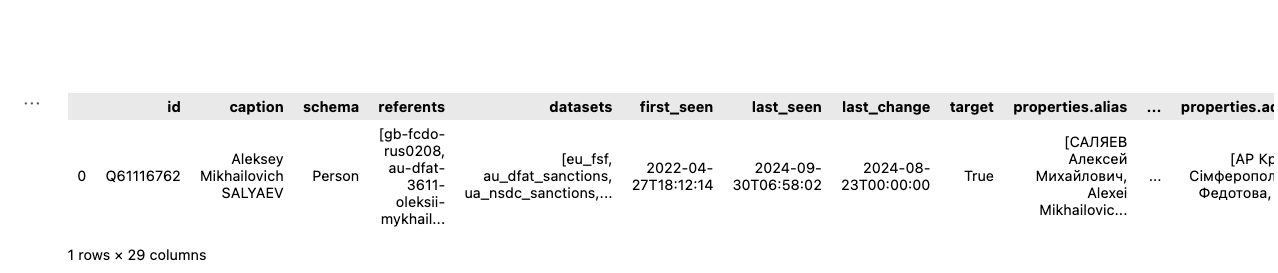

In [229]:
# Uncomment the cell below to see what your DataFrame should look like
Image("../figures/opensanctions/df_sample_v1.png")

## 1.4 Subset for the most interesting `properties` columns

We want to focus on the following properties:

| Property                  | Description                                                                                     | Type   |
|---------------------------|-------------------------------------------------------------------------------------------------|--------|
| `properties.alias`        | The different names that the target is known by.                                                | List   |
| `properties.nationality`  | The nationality(ies) of the target.                                                             | List   |
| `properties.birthCountry` | The country where the target was born. This is stored as a list but should have only one element.| List   |
| `properties.sourceUrl`    | The URL where the information about the target was sourced from. This is stored as a list but should have only one element. | List   |
| `properties.sanctions`    | The sanctions that the target is subject to.                                                    | List   |


- Save the names of the columns above to a list called `interesting_columns`.

- Subset the DataFrame to keep only the columns listed above.

- Replace the `df_sample` variable with the new DataFrame that contains only the interesting columns.

💡 **TIP:** If you have GitHub Copilot installed on your machine, try adding the instructions above to the AI and see if it produces the output you want.

In [230]:
# List of interesting columns
interesting_columns = [
    "properties.alias",
    "properties.nationality",
    "properties.birthCountry",
    "properties.sourceUrl",
    "properties.sanctions"
]

In [231]:
# Subset the DataFrame to keep only the interesting columns
df_sample = df_sample[interesting_columns]

display(df_sample)

,properties.alias,properties.nationality,properties.birthCountry,properties.sourceUrl,properties.sanctions
0,"[САЛЯЕВ Алексей Михайлович, Alexei Mikhailovic...",[ru],[ua],[https://gels-avoirs.dgtresor.gouv.fr/Gels/Reg...,[{'id': 'au-dfat-b9ca38783b02c98ff4860e31b0f9c...


## 1.5 Rename the columns

Let's get rid of the `properties.` prefix in the column names.

If you created the `interesting_columns` list and the `df_sample` correctly, you can run the code below to rename the columns. 

Cut this piece of code and paste it in the cell below:

```python
new_column_names = [col.split('.')[1] for col in interesting_properties]

# Here's a new way to rename columns
df_sample.columns = new_column_names
```

In [232]:
# Generate new column names by removing the 'properties.' prefix
new_column_names = [col.split('.')[1] for col in interesting_columns]

# Rename the columns in the DataFrame
df_sample.columns = new_column_names

# Display the DataFrame to confirm changes
display(df_sample)


,alias,nationality,birthCountry,sourceUrl,sanctions
0,"[САЛЯЕВ Алексей Михайлович, Alexei Mikhailovic...",[ru],[ua],[https://gels-avoirs.dgtresor.gouv.fr/Gels/Reg...,[{'id': 'au-dfat-b9ca38783b02c98ff4860e31b0f9c...


## 🏆 1.6 String Manipulation (Don't explode anything just yet)

We are interested in understanding which countries/entities have imposed sanctions on the target. This means the only column we want to explode is the `properties.sanctions` column. 

All the other columns, despite being lists, should not be exploded. It makes a lot more sense to just convert them to meaningful strings.
Some columns (e.g., birthCountry, alias, nationality) are stored as lists, even when they usually contain a single value or logically belong in a single cell.
To make these columns more meaningful and easier to use (e.g., for filtering or exporting), we want to convert these **lists** into **strings**.

We can use the `apply()` function on each of these columns to convert the lists into strings.

Here's, for example, how I would convert the `birth_country` column from a list to a string:

```python
# Because I know the `birthCountry` column is a list that has just a single element, 
# I can extract it directly like this.
# Run it and check the result before assigning it back to the column
df_sample['birthCountry'].apply(lambda x: x[0])

# To make this change permanent, assign it back to the column
df_sample['birthCountry'] = df_sample['birthCountry'].apply(lambda x: x[0])

```

Explanation of code:
- The apply() function allows us to apply a transformation to each element in a column. 
- For columns like birthCountry, which contain lists with a single element, we can use apply() to extract that single element (e.g., x[0]) and convert it into a string. 
- If birthCountry is ["ua"], applying lambda x: x[0] transforms it into "ua". 
- Assigning this back to the column (df_sample['birthCountry'] = ...) makes the change permanent. 
- After this step, all columns except sanctions will contain plain strings instead of lists.
- This prepares the data for the next step, where only sanctions will be exploded to analyze which countries/entities have imposed sanctions.

In [233]:
# TODO: Convert the birthCountry column to a single string

# Convert the 'birthCountry' column to a single string if it's a list with only one element
df_sample['birthCountry'] = df_sample['birthCountry'].apply(
    lambda x: (
        x[0]  # Extract the first (and only) element if the conditions below are true
        if isinstance(x, list) and len(x) == 1  # Check if 'x' is a list AND has exactly one element
        else x  # Otherwise, leave 'x' unchanged (e.g., if it's not a list or has multiple elements)
    )
)

In [234]:
# Similarly, grab just the first name from the alias list

# Convert the 'alias' column to its first element if it's a non-empty list
df_sample['alias'] = df_sample['alias'].apply(
    lambda x: (
        x[0]  # Extract the first element of the list if the conditions below are true
        if isinstance(x, list) and len(x) > 0  # Check if 'x' is a list AND it has at least one element
        else x  # Otherwise, leave 'x' unchanged (e.g., if it's not a list or is an empty list)
    )
)

In [235]:
# Similarly, just grab the first URL from the sourceUrl list

# Convert the 'sourceUrl' column to its first element if it's a non-empty list
df_sample['sourceUrl'] = df_sample['sourceUrl'].apply(
    lambda x: (
        x[0]  # Extract the first element of the list if the conditions below are true
        if isinstance(x, list) and len(x) > 0  # Check if 'x' is a list AND it has at least one element
        else x  # Otherwise, leave 'x' unchanged (e.g., if it's not a list or is an empty list)
    )
)



In [236]:
#TODO: Use the ", ".join() function to convert the list of nationalities to a single string that separates all the nationalities with a comma and a space

# Convert the 'nationality' column from a list to a single string with comma-separated values
df_sample['nationality'] = df_sample['nationality'].apply(
    lambda x: (
        ", ".join(x)  # Join all elements in the list with a comma if the conditions below are true
        if isinstance(x, list)  # Check if 'x' is a list
        else x  # Otherwise, leave 'x' unchanged (e.g., if it's already a string)
    )
)


In [237]:
# Display the updated DataFrame to verify the change
display(df_sample)

,alias,nationality,birthCountry,sourceUrl,sanctions
0,САЛЯЕВ Алексей Михайлович,ru,ua,https://gels-avoirs.dgtresor.gouv.fr/Gels/Regi...,[{'id': 'au-dfat-b9ca38783b02c98ff4860e31b0f9c...


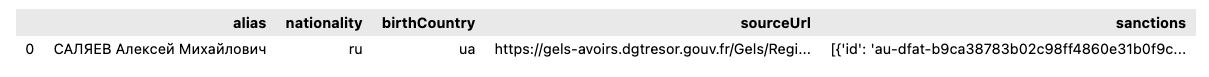

In [238]:
# Uncomment the cell below to see what your DataFrame should look like
Image("../figures/opensanctions/df_sample_v3.png")

## 1.7 Explode the columns

- Use the [DataFrame.explode()](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.explode.html) function to explode the `sanctions` column.

In [239]:
# Explode the sanctions column
df_sample = df_sample.explode('sanctions')

# Display the updated DataFrame to verify the change
display(df_sample)


,alias,nationality,birthCountry,sourceUrl,sanctions
0,САЛЯЕВ Алексей Михайлович,ru,ua,https://gels-avoirs.dgtresor.gouv.fr/Gels/Regi...,{'id': 'au-dfat-b9ca38783b02c98ff4860e31b0f9c8...
0,САЛЯЕВ Алексей Михайлович,ru,ua,https://gels-avoirs.dgtresor.gouv.fr/Gels/Regi...,{'id': 'be-fod-b614c4124050ffc8026f33e047687fb...
0,САЛЯЕВ Алексей Михайлович,ru,ua,https://gels-avoirs.dgtresor.gouv.fr/Gels/Regi...,{'id': 'ca-sema-8159ef9b659e50844d6dfc202ddb41...
0,САЛЯЕВ Алексей Михайлович,ru,ua,https://gels-avoirs.dgtresor.gouv.fr/Gels/Regi...,{'id': 'ch-seco-ed9c37948250b396934fcad975f889...
0,САЛЯЕВ Алексей Михайлович,ru,ua,https://gels-avoirs.dgtresor.gouv.fr/Gels/Regi...,{'id': 'eu-fsf-dcda1f3baa54269ca6de446ddde0b5b...
0,САЛЯЕВ Алексей Михайлович,ru,ua,https://gels-avoirs.dgtresor.gouv.fr/Gels/Regi...,{'id': 'eu-tb-af54460497b44ac7ffd29c9cdfc9e805...
0,САЛЯЕВ Алексей Михайлович,ru,ua,https://gels-avoirs.dgtresor.gouv.fr/Gels/Regi...,{'id': 'eu-tb-d9fc7a31d1f34e72e5effefbcefa6b78...
0,САЛЯЕВ Алексей Михайлович,ru,ua,https://gels-avoirs.dgtresor.gouv.fr/Gels/Regi...,{'id': 'fr-ga-69da9f08fe7cbbb366f62d65ed8d5c09...
0,САЛЯЕВ Алексей Михайлович,ru,ua,https://gels-avoirs.dgtresor.gouv.fr/Gels/Regi...,{'id': 'gb-fcdo-e05a6ff863d7ab10f453ad909dddf4...
0,САЛЯЕВ Алексей Михайлович,ru,ua,https://gels-avoirs.dgtresor.gouv.fr/Gels/Regi...,{'id': 'gb-hmt-10625340ba89ed2059109526fad8f0e...


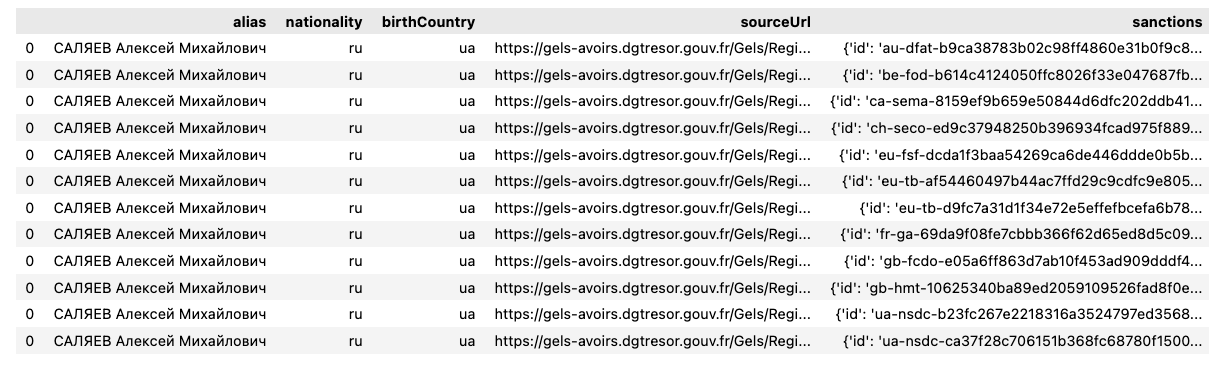

In [240]:
# Uncomment the cell below to see what your DataFrame should look like
Image("../figures/opensanctions/df_sample_v4.png")

In [241]:
# Using method chaining to explode the sanctions column

# Define the columns of interest that we want to extract from the JSON
interesting_columns = [
    'properties.alias',          # List of aliases
    'properties.nationality',    # List of nationalities
    'properties.birthCountry',   # List containing birth country information
    'properties.sourceUrl',      # List of URLs as references
    'properties.sanctions'       # List of sanctions
]

# Open the JSON file in read mode and load its content as a Python dictionary
with open('../data/opensanctions/sample_single_target.json', mode='r') as file:
    sample_target = json.load(file)

# Process the JSON file and transform it into a clean pandas DataFrame
df_sample = (
    # Convert the nested JSON structure into a flat DataFrame
    pd.json_normalize(sample_target)
    
    # Keep only the columns we are interested in
    [interesting_columns]
    
    # Rename the columns for easier access and understanding
    .rename(columns={
        'properties.alias': 'alias',                  # Shorten to 'alias'
        'properties.nationality': 'nationality',      # Shorten to 'nationality'
        'properties.birthCountry': 'birthCountry',    # Shorten to 'birthCountry'
        'properties.sourceUrl': 'sourceUrl',          # Shorten to 'sourceUrl'
        'properties.sanctions': 'sanctions'           # Shorten to 'sanctions'
    })
    
    # Use .assign() to apply transformations to specific columns
    .assign(
        # Transform 'alias': If it's a list, extract the first element
        alias=lambda x: x['alias'].apply(lambda x: x[0]),
        
        # Transform 'sourceUrl': If it's a list, extract the first element
        sourceUrl=lambda x: x['sourceUrl'].apply(lambda x: x[0]),
        
        # Transform 'nationality': Join list elements into a comma-separated string
        nationality=lambda x: x['nationality'].apply(lambda x: ", ".join(x)),
        
        # Transform 'birthCountry': If it's a single-element list, extract the first element
        birthCountry=lambda x: x['birthCountry'].apply(lambda x: x[0])
    )
    
    # Explode the 'sanctions' column: Create one row per sanction
    .explode('sanctions')
)

# Display the final DataFrame to verify the results
df_sample



,alias,nationality,birthCountry,sourceUrl,sanctions
0,САЛЯЕВ Алексей Михайлович,ru,ua,https://gels-avoirs.dgtresor.gouv.fr/Gels/Regi...,{'id': 'au-dfat-b9ca38783b02c98ff4860e31b0f9c8...
0,САЛЯЕВ Алексей Михайлович,ru,ua,https://gels-avoirs.dgtresor.gouv.fr/Gels/Regi...,{'id': 'be-fod-b614c4124050ffc8026f33e047687fb...
0,САЛЯЕВ Алексей Михайлович,ru,ua,https://gels-avoirs.dgtresor.gouv.fr/Gels/Regi...,{'id': 'ca-sema-8159ef9b659e50844d6dfc202ddb41...
0,САЛЯЕВ Алексей Михайлович,ru,ua,https://gels-avoirs.dgtresor.gouv.fr/Gels/Regi...,{'id': 'ch-seco-ed9c37948250b396934fcad975f889...
0,САЛЯЕВ Алексей Михайлович,ru,ua,https://gels-avoirs.dgtresor.gouv.fr/Gels/Regi...,{'id': 'eu-fsf-dcda1f3baa54269ca6de446ddde0b5b...
0,САЛЯЕВ Алексей Михайлович,ru,ua,https://gels-avoirs.dgtresor.gouv.fr/Gels/Regi...,{'id': 'eu-tb-af54460497b44ac7ffd29c9cdfc9e805...
0,САЛЯЕВ Алексей Михайлович,ru,ua,https://gels-avoirs.dgtresor.gouv.fr/Gels/Regi...,{'id': 'eu-tb-d9fc7a31d1f34e72e5effefbcefa6b78...
0,САЛЯЕВ Алексей Михайлович,ru,ua,https://gels-avoirs.dgtresor.gouv.fr/Gels/Regi...,{'id': 'fr-ga-69da9f08fe7cbbb366f62d65ed8d5c09...
0,САЛЯЕВ Алексей Михайлович,ru,ua,https://gels-avoirs.dgtresor.gouv.fr/Gels/Regi...,{'id': 'gb-fcdo-e05a6ff863d7ab10f453ad909dddf4...
0,САЛЯЕВ Алексей Михайлович,ru,ua,https://gels-avoirs.dgtresor.gouv.fr/Gels/Regi...,{'id': 'gb-hmt-10625340ba89ed2059109526fad8f0e...


# 1.8. See the solution

Putting it all together, here's what the solution would look like if you were to use method-chaining:

<details><summary>Click HERE for the solution</summary>

```python
interesting_columns = ['properties.alias', 
                       'properties.nationality', 
                       'properties.birthCountry', 
                       'properties.sourceUrl', 
                       'properties.sanctions']

with open('../data/opensanctions/sample_single_target.json', mode='r') as file:
    sample_target = json.load(file)

df_sample = (
    pd.json_normalize(sample_target)
    [interesting_columns]
    .rename(columns={
        'properties.alias': 'alias',
        'properties.nationality': 'nationality',
        'properties.birthCountry': 'birthCountry',
        'properties.sourceUrl': 'sourceUrl',
        'properties.sanctions': 'sanctions'
    })
    .assign(
        alias=lambda x: x['alias'].apply(lambda x: x[0]),
        sourceUrl=lambda x: x['sourceUrl'].apply(lambda x: x[0]),
        nationality=lambda x: x['nationality'].apply(lambda x: ", ".join(x)),
        birthCountry=lambda x: x['birthCountry'].apply(lambda x: x[0])
    )
    .explode('sanctions')
)

df_sample
```

# 2. Unnest the `sanctions` column

We have a lot of stuff but our `sanctions` column is still nested.

We can't explode it, as the data inside is not a list, but a dictionary.

Give it a go:

```python
# This won't work. Explode only works with lists
df_sample.explode('sanctions')
```

We need to:

- Keep the other columns as they are
- Work separately on the `sanctions` column, using the `pd.json_normalize()` function to normalise the data inside it.
- Concatenate the resulting DataFrame with the original one, keeping the index aligned.

## 2.1 Convert the entire `sanctions` column into a DataFrame of its own

For this to work, we first need to convert the 'sanctions' column back to a 'pure Python' list of dictionaries

```python
# You can normalise a pandas column when they are lists of dictionaries
# json_normalise is not just for 'pure Python' lists of dictionaries
pd.json_normalize(df_sample['sanctions'])
```

Copy the code above and paste it in the cell below to observe the output.

In [242]:
# Convert the 'sanctions' column into a separate DataFrame
sanctions_df = pd.json_normalize(df_sample['sanctions'])

# Display the resulting DataFrame to observe the output
display(sanctions_df)

,id,caption,schema,nts,datasets,first_seen,last_seen,last_change,target,properties.entity,...,properties.authority,referents,properties.reason,properties.authorityId,properties.listingDate,properties.provisions,properties.modifiedAt,properties.status,properties.endDate,properties.duration
0,au-dfat-b9ca38783b02c98ff4860e31b0f9c80056c953c0,Autonomous (Ukraine),Sanction,[],[au_dfat_sanctions],2023-04-20T12:10:15,2024-09-30T06:02:03,2024-06-23T20:02:02,False,[Q61116762],...,[Department of Foreign Affairs and Trade],NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,be-fod-b614c4124050ffc8026f33e047687fb32fbc4981,UKR,Sanction,NaN,[be_fod_sanctions],2023-04-20T12:13:17,2024-09-30T06:17:02,2023-04-20T12:13:17,False,[Q61116762],...,[Federal Public Service Finance],[],[2020/1267 (OJ L298)],[EU.5064.30],[2020-09-11],NaN,NaN,NaN,NaN,NaN
2,ca-sema-8159ef9b659e50844d6dfc202ddb41c8bbe63d42,Russia / Russie,Sanction,NaN,[ca_dfatd_sema_sanctions],2024-08-06T09:43:02,2024-09-30T06:43:02,2024-08-06T09:43:02,False,[Q61116762],...,[Global Affairs Canada],[],"[1, Part 1]",[112],NaN,NaN,NaN,NaN,NaN,NaN
3,ch-seco-ed9c37948250b396934fcad975f8891ceae4bfbd,Ordinance of 4 March 2022 on measures related ...,Sanction,NaN,[ch_seco_sanctions],2023-04-20T12:16:14,2024-09-24T00:00:00,2024-08-16T00:00:00,False,[Q61116762],...,[State Secretariat for Economic Affairs],[],NaN,[40229],"[2020-04-02, 2019-04-02, 2020-09-29]",NaN,NaN,NaN,NaN,NaN
4,eu-fsf-dcda1f3baa54269ca6de446ddde0b5b798fdadb6,UKR,Sanction,NaN,[eu_fsf],2023-04-20T18:00:25,2024-09-30T06:57:03,2024-08-08T16:57:03,False,[Q61116762],...,"[Directorate‑General for Financial Stability, ...",[],[2020/1267 (OJ L298)],[EU.5064.30],[2020-09-11],NaN,NaN,NaN,NaN,NaN
5,eu-tb-af54460497b44ac7ffd29c9cdfc9e805aa3a53fd,Sanction,Sanction,NaN,[eu_travel_bans],2024-02-23T15:37:01,2024-09-30T06:37:02,2024-06-23T21:37:02,False,[Q61116762],...,[Council of the European Union],[],[Council Decision concerning restrictive measu...,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,eu-tb-d9fc7a31d1f34e72e5effefbcefa6b78b8481d1b,Sanction,Sanction,NaN,[eu_travel_bans],2024-02-26T18:37:01,2024-09-30T06:37:02,2024-06-23T21:37:02,False,[Q61116762],...,[Council of the European Union],[],[Council Decision concerning restrictive measu...,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,fr-ga-69da9f08fe7cbbb366f62d65ed8d5c092ee52123,(UE) 2019/409 du 14/03/2019 (UE Ukraine intégr...,Sanction,NaN,[fr_tresor_gels_avoir],2023-04-20T10:12:18,2024-09-30T06:58:02,2024-06-23T21:58:02,False,[Q61116762],...,[Direction Générale du Trésor],[],[Commandant du navire de patrouille frontalièr...,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,gb-fcdo-e05a6ff863d7ab10f453ad909dddf44f6d126485,The Russia (Sanctions) (EU Exit) Regulations 2019,Sanction,NaN,[gb_fcdo_sanctions],2024-05-09T21:39:15,2024-09-30T06:40:02,2024-06-23T20:40:03,False,[Q61116762],...,"[Foreign, Commonwealth & Development Office, UK]",[],[Commanding officer of the border patrol boat ...,[RUS0208],NaN,"[Asset freeze, Travel Ban, Trust Services Sanc...",[2023-03-20],NaN,NaN,NaN
9,gb-hmt-10625340ba89ed2059109526fad8f0e032a2764a,Russia,Sanction,NaN,[gb_hmt_sanctions],2023-04-20T10:42:49,2024-09-30T06:14:02,2023-10-17T12:01:46,False,[Q61116762],...,"[Office of Financial Sanctions Implementation,...",[],[Commanding officer of the border patrol boat ...,[RUS0208],[2019],[Asset freeze],[2023-03-21],[Asset Freeze Targets],NaN,NaN


From the resulting DataFrame above, we definitely want the `properties.country` (renamed to just `sanction_country`), but we want it as a string, not as a list.

Figure out how to create this column and add it to the DataFrame.

In [243]:
# TODO: Write some code until I can add a df_sample['sanction_country'] column to the DataFrame

# Let me look at just the 'properties.country' column
pd.json_normalize(df_sample['sanctions'])['properties.country']


0     [au]
1     [be]
2     [ca]
3     [ch]
4     [eu]
5     [eu]
6     [eu]
7     [fr]
8     [gb]
9     [gb]
10    [ua]
11    [ua]
Name: properties.country, dtype: object

In [244]:
(
    pd.json_normalize(df_sample['sanctions'])['properties.country']
    .apply(lambda x: x[0])
)

0     au
1     be
2     ca
3     ch
4     eu
5     eu
6     eu
7     fr
8     gb
9     gb
10    ua
11    ua
Name: properties.country, dtype: object

In [245]:
# Then I can just assign the result to a new column
df_sample['sanctions_country'] = (
    pd.json_normalize(df_sample['sanctions'])['properties.country']
    .apply(lambda x: x[0])
)

In [246]:
df_sample

,alias,nationality,birthCountry,sourceUrl,sanctions,sanctions_country
0,САЛЯЕВ Алексей Михайлович,ru,ua,https://gels-avoirs.dgtresor.gouv.fr/Gels/Regi...,{'id': 'au-dfat-b9ca38783b02c98ff4860e31b0f9c8...,au
0,САЛЯЕВ Алексей Михайлович,ru,ua,https://gels-avoirs.dgtresor.gouv.fr/Gels/Regi...,{'id': 'be-fod-b614c4124050ffc8026f33e047687fb...,au
0,САЛЯЕВ Алексей Михайлович,ru,ua,https://gels-avoirs.dgtresor.gouv.fr/Gels/Regi...,{'id': 'ca-sema-8159ef9b659e50844d6dfc202ddb41...,au
0,САЛЯЕВ Алексей Михайлович,ru,ua,https://gels-avoirs.dgtresor.gouv.fr/Gels/Regi...,{'id': 'ch-seco-ed9c37948250b396934fcad975f889...,au
0,САЛЯЕВ Алексей Михайлович,ru,ua,https://gels-avoirs.dgtresor.gouv.fr/Gels/Regi...,{'id': 'eu-fsf-dcda1f3baa54269ca6de446ddde0b5b...,au
0,САЛЯЕВ Алексей Михайлович,ru,ua,https://gels-avoirs.dgtresor.gouv.fr/Gels/Regi...,{'id': 'eu-tb-af54460497b44ac7ffd29c9cdfc9e805...,au
0,САЛЯЕВ Алексей Михайлович,ru,ua,https://gels-avoirs.dgtresor.gouv.fr/Gels/Regi...,{'id': 'eu-tb-d9fc7a31d1f34e72e5effefbcefa6b78...,au
0,САЛЯЕВ Алексей Михайлович,ru,ua,https://gels-avoirs.dgtresor.gouv.fr/Gels/Regi...,{'id': 'fr-ga-69da9f08fe7cbbb366f62d65ed8d5c09...,au
0,САЛЯЕВ Алексей Михайлович,ru,ua,https://gels-avoirs.dgtresor.gouv.fr/Gels/Regi...,{'id': 'gb-fcdo-e05a6ff863d7ab10f453ad909dddf4...,au
0,САЛЯЕВ Алексей Михайлович,ru,ua,https://gels-avoirs.dgtresor.gouv.fr/Gels/Regi...,{'id': 'gb-hmt-10625340ba89ed2059109526fad8f0e...,au


In [247]:
df_sample = df_sample.drop(columns='sanctions').copy()

In [248]:
df_sample

,alias,nationality,birthCountry,sourceUrl,sanctions_country
0,САЛЯЕВ Алексей Михайлович,ru,ua,https://gels-avoirs.dgtresor.gouv.fr/Gels/Regi...,au
0,САЛЯЕВ Алексей Михайлович,ru,ua,https://gels-avoirs.dgtresor.gouv.fr/Gels/Regi...,au
0,САЛЯЕВ Алексей Михайлович,ru,ua,https://gels-avoirs.dgtresor.gouv.fr/Gels/Regi...,au
0,САЛЯЕВ Алексей Михайлович,ru,ua,https://gels-avoirs.dgtresor.gouv.fr/Gels/Regi...,au
0,САЛЯЕВ Алексей Михайлович,ru,ua,https://gels-avoirs.dgtresor.gouv.fr/Gels/Regi...,au
0,САЛЯЕВ Алексей Михайлович,ru,ua,https://gels-avoirs.dgtresor.gouv.fr/Gels/Regi...,au
0,САЛЯЕВ Алексей Михайлович,ru,ua,https://gels-avoirs.dgtresor.gouv.fr/Gels/Regi...,au
0,САЛЯЕВ Алексей Михайлович,ru,ua,https://gels-avoirs.dgtresor.gouv.fr/Gels/Regi...,au
0,САЛЯЕВ Алексей Михайлович,ru,ua,https://gels-avoirs.dgtresor.gouv.fr/Gels/Regi...,au
0,САЛЯЕВ Алексей Михайлович,ru,ua,https://gels-avoirs.dgtresor.gouv.fr/Gels/Regi...,au


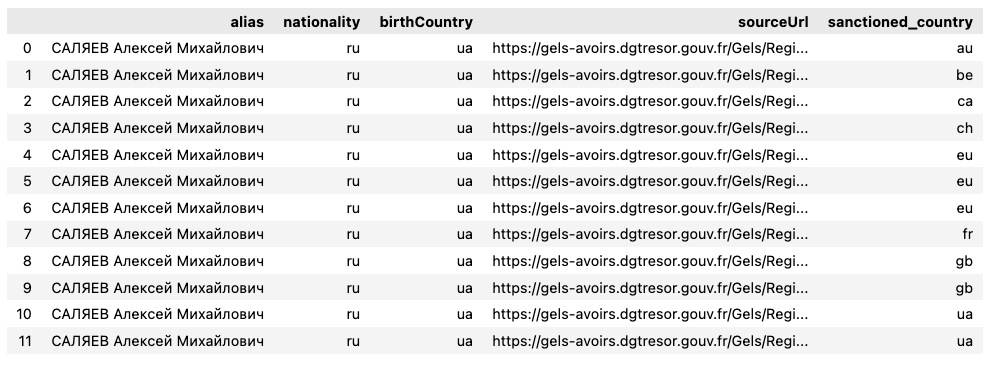

In [249]:
## Uncomment the cell below to see what your DataFrame should look like
Image("../figures/opensanctions/df_sample_v5.png")

# 3. A larger dataset

Let's use a much larger dataset now. Small tweaks to the code are necessary, as some of the data is missing plus we have more than one target.

In [250]:
# This is a list of JSON objects (each element is a JSON object like the sample we've used above)
df_targets = pd.read_json('../data/opensanctions/targets_sample_4000.jsonl', lines=True)
df_targets.head()

,id,caption,schema,properties,referents,datasets,first_seen,last_seen,last_change,target
0,NK-YPMWhnEtqnRViPgZx2ET7N,"Tovarystvo z obmezhenoiu vidpovidalnistiu ""Tek...",Organization,"{'innCode': ['5904094273'], 'jurisdiction': ['...",[ua-nsdc-24776-tovaristvo-z-obmezenou-vidpovid...,[ua_nsdc_sanctions],2023-05-25T20:13:16,2024-09-30T06:22:04,2024-03-06T18:31:06,True
1,ua-nsdc-15471-dovtaev-alihan-isajovic,Dovtaiev Alikhan Isaiovych,Person,"{'alias': ['Довтаєв Аліхан Ісайович', 'DOVTAIE...",[],[ua_nsdc_sanctions],2023-04-20T10:50:14,2024-09-30T06:22:04,2024-03-06T18:31:06,True
2,il-nbctf-9d2131feeb8917c9f53877a5c7cf1b86f0fd8cdc,468002109,CryptoWallet,"{'publicKey': ['468002109'], 'topics': ['crime...",[],[il_mod_crypto],2024-04-05T13:51:48,2024-09-30T06:02:03,2024-04-05T13:51:48,True
3,NK-djckrSBnoZYnm2PngKZRaJ,Samarchenko Svitlana Vitaliyivna,Person,"{'name': ['Samarchenko Svitlana Vitaliyivna', ...","[ua-nsdc-13365-samarcenko-svitlana-vitaliivna,...",[ua_nsdc_sanctions],2023-04-20T10:50:14,2024-09-30T06:22:04,2024-03-06T18:31:06,True
4,Q61116762,Aleksey Mikhailovich SALYAEV,Person,"{'alias': ['САЛЯЕВ Алексей Михайлович', 'Alexe...","[gb-fcdo-rus0208, au-dfat-3611-oleksii-mykhail...","[eu_fsf, au_dfat_sanctions, ua_nsdc_sanctions,...",2022-04-27T18:12:14,2024-09-30T06:58:02,2024-08-23T00:00:00,True


Just like before, we just care about the 'properties' columns, but this time we have a lot more data:

In [251]:
df_targets['properties'].head()

0    {'innCode': ['5904094273'], 'jurisdiction': ['...
1    {'alias': ['Довтаєв Аліхан Ісайович', 'DOVTAIE...
2    {'publicKey': ['468002109'], 'topics': ['crime...
3    {'name': ['Samarchenko Svitlana Vitaliyivna', ...
4    {'alias': ['САЛЯЕВ Алексей Михайлович', 'Alexe...
Name: properties, dtype: object

We can normalise the 'properties' column and work with the resulting DataFrame.


In [252]:
interesting_columns = ['alias', 'nationality', 'birthCountry', 'sourceUrl', 'sanctions']
pd.json_normalize(df_targets['properties'])[interesting_columns]

,alias,nationality,birthCountry,sourceUrl,sanctions
0,"[Limited Liability Company ""Composite Tech№log...",NaN,NaN,NaN,[{'id': 'ua-nsdc-1a55567bf27b82e85aaa21c74ed43...
1,"[Довтаєв Аліхан Ісайович, DOVTAIEV ALIKHAN]",[ru],NaN,NaN,[{'id': 'ua-nsdc-6d9d313cafb495bc2adff58623044...
2,NaN,NaN,NaN,NaN,NaN
3,"[Самарченко Светлана Витальевна, Samarchenko S...",[ua],NaN,NaN,[{'id': 'ua-nsdc-254540b0426981a248dd23ad55938...
4,"[САЛЯЕВ Алексей Михайлович, Alexei Mikhailovic...",[ru],[ua],[https://gels-avoirs.dgtresor.gouv.fr/Gels/Reg...,[{'id': 'au-dfat-b9ca38783b02c98ff4860e31b0f9c...
...,...,...,...,...,...
3995,"[Агафонова Наталя Миколаївна, Агафонова Наталь...",[ru],NaN,NaN,[{'id': 'ua-nsdc-640bb3ba773bf28d09c6cfa6ff3b0...
3996,NaN,[ir],NaN,[https://sanctionssearch.ofac.treas.gov/Detail...,[{'id': 'ofac-c206e06e1f947b5884af787983b6aa90...
3997,"[Ginsburg Vladimir, Гинсбург Владимир Срульеви...",[ru],NaN,NaN,[{'id': 'ua-nsdc-1298251b55b833bfbbe09baef1b3b...
3998,NaN,NaN,NaN,[https://sanctionssearch.ofac.treas.gov/Detail...,[{'id': 'ofac-16649d709282f4b69ea21d00ea9be712...


☝️ Notice how this time around there are some NaN values in the DataFrame. This is because some of the 'properties' columns are missing in some of the rows.

We need to consider this when we normalise the data!

Your task now is to **understand everything the code below does** and then **run it**.


In [253]:
# Step 1: Read the JSON Lines file into a pandas DataFrame
# This reads the file, where each line is a separate JSON object, and creates a DataFrame.
df_targets = pd.read_json('../data/opensanctions/targets_sample_4000.jsonl', lines=True)

# Step 2: Define the columns of interest
# We are focusing only on specific columns within the nested 'properties' field of the JSON.
interesting_columns = ['alias', 'nationality', 'birthCountry', 'sourceUrl', 'sanctions']

# Extract the nested 'properties' field and flatten it into a tabular format
# Only the columns defined in 'interesting_columns' are kept.
df_targets = pd.json_normalize(df_targets['properties'])[interesting_columns]

# Step 3: Transform and clean up the data using the assign() method
# The assign() method allows us to add new columns or modify existing ones in a clean and concise way.
df_targets = (
    df_targets
    .assign(
        # For the 'alias' column: Extract the first element if it is a list; otherwise, set to None
        alias=lambda x: x['alias'].apply(lambda x: x[0] if isinstance(x, list) else None),

        # For the 'sourceUrl' column: Extract the first element if it is a list; otherwise, set to None
        sourceUrl=lambda x: x['sourceUrl'].apply(lambda x: x[0] if isinstance(x, list) else None),

        # For the 'nationality' column: Join elements of the list into a comma-separated string
        # If it's not a list, set to None
        nationality=lambda x: x['nationality'].apply(lambda x: ", ".join(x) if isinstance(x, list) else None),

        # For the 'birthCountry' column: Extract the first element if it is a list; otherwise, set to None
        birthCountry=lambda x: x['birthCountry'].apply(lambda x: x[0] if isinstance(x, list) else None)
    )
    # Step 4: Explode the 'sanctions' column
    # This creates a new row for each entry in the 'sanctions' list, while repeating other column values.
    .explode('sanctions')
)

# Step 5: Extract the 'sanction_country' column from the 'sanctions' dictionary
# First, flatten the 'sanctions' column into its own DataFrame to access its nested keys
sanction_country = pd.json_normalize(df_targets['sanctions'])['properties.country']

# Clean up the 'sanction_country' data
# If 'properties.country' is a list, extract the first element; otherwise, set to None
sanction_country = sanction_country.apply(lambda x: x[0] if isinstance(x, list) else None).tolist()

# Add the cleaned 'sanction_country' data as a new column in the original DataFrame
df_targets['sanction_country'] = sanction_country

# Step 6: Drop the original 'sanctions' column
# Once we've extracted the needed data, we no longer need the 'sanctions' column.
df_targets = df_targets.drop(columns='sanctions')

# The final DataFrame is displayed, showing the cleaned and transformed data
df_targets


,alias,nationality,birthCountry,sourceUrl,sanction_country
0,"Limited Liability Company ""Composite Tech№logy""",None,None,None,ua
1,Довтаєв Аліхан Ісайович,ru,None,None,ua
1,Довтаєв Аліхан Ісайович,ru,None,None,ua
2,None,None,None,None,None
3,Самарченко Светлана Витальевна,ua,None,None,ua
...,...,...,...,...,...
3997,Ginsburg Vladimir,ru,None,None,ua
3998,None,None,None,https://sanctionssearch.ofac.treas.gov/Details...,us
3999,BABII ANNA,ua,None,None,ua
3999,BABII ANNA,ua,None,None,ua


# 4. Groupby -> Apply (Agg) -> Combine

Write code to group the data by the `sanction_country` column and count the number of sanctions imposed by each country.

(If you have time, create a bar plot to visualise the results)

(If you REALLY have time, search online for the `pycountry` library and use it to convert the country codes to meaningful country names -- use pd.merge() to join the dataframes)

In [254]:
# How many sanctions did each country impose on targets?
df_targets['sanction_country'].value_counts()

sanction_country
ua    2420
us    1886
eu    1109
gb     724
ch     470
be     441
mc     420
fr     414
ca     369
jp     254
au     242
kz     170
tr     144
nz     141
kg      82
il      79
za      66
md      59
id      54
pl      51
ar      50
ir      34
ee      33
it      26
lt      25
ae      21
in      18
nl      14
at      11
hr      11
my      11
ro       8
gr       8
lv       7
sg       6
fi       5
es       5
np       4
az       3
cz       2
ng       2
sk       1
ie       1
si       1
Name: count, dtype: int64

## 4.1 Asking better questions

**You should always critically evaluate the results you get from your code and reformulate your questions if necessary.**

Let's do that.

What if our question now was:

> **How many targets were sanctioned by each country?**

A good way to answer this question is to group the data by the `sanction_country` column and count the number of unique targets in each group.

In [255]:
# Group by 'sanction_country' 
# and count the number of unique/distinct 'alias', 
# it doesn't matter how many sanctions each country imposed on each target
df_targets.groupby(['sanction_country']).agg({'alias': 'nunique'})

,alias
sanction_country,
ae,4
ar,45
at,2
au,229
az,0
be,382
ca,297
ch,408
cz,1


Or with `groupby().apply()`:

In [256]:
# Define a lambda function to calculate the number of unique targets (aliases) for each group
get_num_unique_targets = lambda x: pd.Series({
    'num_targets': x['alias'].nunique()  # Count the number of unique aliases in the 'alias' column
})

# Group the DataFrame by 'sanction_country' and apply the lambda function
result = (
    df_targets.groupby(['sanction_country'])  # Group the DataFrame by the 'sanction_country' column
              .apply(get_num_unique_targets, include_groups=False)  # Apply the lambda function to each group
)

# The result is a new DataFrame where each row represents a sanction country
# and the 'num_targets' column contains the count of unique aliases for that country.

result


,num_targets
sanction_country,
ae,4
ar,45
at,2
au,229
az,0
be,382
ca,297
ch,408
cz,1


In [257]:
# Reorder the DataFrame by the number of unique targets
(
    df_targets.groupby(['sanction_country'])
              .apply(get_num_unique_targets, include_groups=False)
              .sort_values(by='num_targets', ascending=False)
)

,num_targets
sanction_country,
ua,1444
us,860
eu,421
ch,408
fr,384
be,382
mc,354
gb,335
ca,297


The grouped DataFrame will have the `sanction_country` as the index and the number of unique targets as the values. If we want it as a regular DataFrame, we can use the `reset_index()` function.

In [258]:
df_country_sanctions = (
    df_targets.groupby(['sanction_country'])
              .apply(get_num_unique_targets, include_groups=False)
              .sort_values(by='num_targets', ascending=False)
              .reset_index()
)

# Look at the top 10
df_country_sanctions.head(10)

,sanction_country,num_targets
0,ua,1444
1,us,860
2,eu,421
3,ch,408
4,fr,384
5,be,382
6,mc,354
7,gb,335
8,ca,297
9,au,229


## 4.2 Get nicer country names

There is this nice Python package called `pycountry` that can help us get the full country names from these two-digit country codes.

In [259]:
# Function to get the full country name and flag from a country code
def get_country_name(code):
    # Use the 'pycountry' library to look up a country by its 2-letter ISO code
    selected_country = pycountry.countries.get(alpha_2=code)

    # If no country is found for the given code
    if selected_country is None:
        # Special handling for 'eu' (European Union) since it's not in the ISO country list
        if code == 'eu':
            return 'European Union 🇪🇺'  # Return a formatted string with the EU flag emoji
        else:
            return code  # Return the code itself if it's not found
    else:
        # If the country is found, return its name and flag
        return f"{selected_country.name} {selected_country.flag}"


In [260]:
df_country_sanctions['sanction_country'] = df_country_sanctions['sanction_country'].apply(get_country_name)
df_country_sanctions.head(10)

,sanction_country,num_targets
0,Ukraine 🇺🇦,1444
1,United States 🇺🇸,860
2,European Union 🇪🇺,421
3,Switzerland 🇨🇭,408
4,France 🇫🇷,384
5,Belgium 🇧🇪,382
6,Monaco 🇲🇨,354
7,United Kingdom 🇬🇧,335
8,Canada 🇨🇦,297
9,Australia 🇦🇺,229


## 4.3 Create a bar plot

In [262]:
# Step 1: Sort the DataFrame by 'num_targets' in ascending order
plot_df = (
    df_country_sanctions.sort_values(by='num_targets', ascending=True)

    # Step 2: Select only the last 10 rows (countries with the highest number of targets)
    .tail(10)
)


In [263]:
# Step 1: Create a bar plot using ggplot
(
    ggplot(plot_df,  # Use the DataFrame `plot_df`, which contains the top 10 countries
           aes(y='sanction_country', x='num_targets', fill='num_targets'))  
           # Map aesthetics (aes):
           # y-axis: 'sanction_country' (the country names)
           # x-axis: 'num_targets' (the number of unique targets per country)
           # fill: Use the 'num_targets' column to control the bar color gradient

    # Step 2: Add bars to the plot
    + geom_bar(stat='identity')  
      # `stat='identity'`: Use the actual values in the data (from 'num_targets') for bar heights.

    # Step 3: Add text labels showing the number of targets
    + geom_text(aes(label='num_targets'), nudge_x=50, size=6)  
      # `label='num_targets'`: Display the number of targets on top of each bar.
      # `nudge_x=50`: Slightly shift the labels to the right for better visibility.
      # `size=6`: Adjust the text size for readability.

    # Step 4: Add a gradient to the fill color of the bars
    + scale_fill_gradient(name="Number of targets", low='blue', high='red', guide='none')  
      # `low='blue', high='red'`: Bars with fewer targets are blue, and those with more are red.
      # `guide='none'`: Removes the legend for the fill gradient.

    # Step 5: Add a title, subtitle, and axis labels to the plot
    + labs(
        title='Unsurprisingly, Ukraine is the country with the most sanctions',  
        # Title of the plot.
        subtitle="Our sample consists of 4000 random targets so don't read too much into this",  
        # Subtitle providing context for the data.
        x='Number of unique targets',  # Label for the x-axis.
        y='Top 10 countries'  # Label for the y-axis.
    )

    # Step 6: Adjust the plot's size
    + ggsize(800, 300)  
      # Set the width to 800 pixels and height to 300 pixels.

    # Step 7: Customize the theme of the plot
    + theme(
        plot_title=element_text(size=14, face='bold'),  
        # Make the title bold and set the font size to 14.
        plot_subtitle=element_text(size=12),  
        # Set the subtitle font size to 12.
    )
)
